# **1. Import libraries and Dataset**

In [2]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log_fem.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('PROJECT FILE 2 STARTS RUNNING!')

INFO:root:PROJECT FILE 2 STARTS RUNNING!


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

import pickle

import warnings
warnings.filterwarnings('ignore')

logger.info('LIBRARIES IMPORTED')

INFO:root:LIBRARIES IMPORTED


In [4]:
df = pd.read_csv('Credit_Card_2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
logger.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

INFO:root:DATA IMPORTED AND EXTRACTED TO DATAFRAME!


# **2. Feature Engineering**

In [6]:
logger.info('FEATURE ENGINEERING STARTS!')

INFO:root:FEATURE ENGINEERING STARTS!


## **2.1 Handling the imbalance of data using SMOTE**

In [ ]:
logger.info('HANDLING IMBALANCED DATA STARTS!')

INFO:root:HANDLING IMBALANCED DATA STARTS!


In [7]:
# Initialise SMOTE object
smote = SMOTE()

In [8]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['default']

In [9]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [10]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


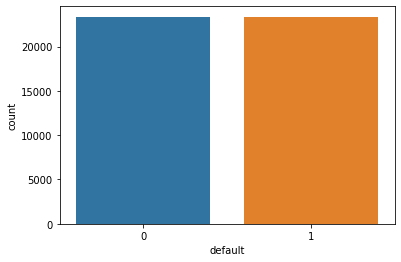

In [13]:
#plot to check if the dataframe is balanced after smote
sns.countplot('default', data = df_final)

In [ ]:
df_final.default.value_counts()

1    23364
0    23364
Name: default, dtype: int64

In [ ]:
logger.info('HANDLING IMBALANCED DATA ENDS!')

INFO:root:HANDLING IMBALANCED DATA ENDS!


Done!

Next, we need to perform One Hot Encoding on the categorical variables.
But before that, we need to work on the following points:
- Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
- Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
- Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.
- Change values in SEX: 
  - 1-Male and 
  - 2-Female
- Change values in EDUCATION : 
  - 1 : Graguation
  - 2 : University
  - 3 : High School
  - 0,4,5,6 : Others
- Change values in Marriage:
  - 1 : Married
  - 2 : Single
  - 0,3 : Others


In [14]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df_final.shape

(46728, 25)

## **2.2 Encoding categorical variables**

In [ ]:
logger.info('ENCODING CATEGORICAL VARIABLE STARTS!')

INFO:root:ENCODING CATEGORICAL VARIABLE STARTS!


In [16]:
# Encoding categorical variables
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])

df_final.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,default,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,1,0,0,0,0,1,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,1,0,0,0,0,1,0,0,1
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,0,1,0,0,1
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,1,0,0,0,0,1,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,0,1,0,0,0,1,1,0,0


In [17]:
# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [ ]:
df_final.shape

(46728, 30)

In [ ]:
logger.info('ENCODING CATEGORICAL VARIABLE ENDS!')

INFO:root:ENCODING CATEGORICAL VARIABLE ENDS!


# **3. Model-1 : Basic Model with all features**

In [ ]:
logger.info('MODEL-1 RUNNING!')

INFO:root:MODEL-1 RUNNING!


In [18]:
# Rearrange columns in dataframe before submitting for modeling
df_final = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'default']]

In [19]:
#df_model = df_final.sample(frac=0.10, random_state=100)
# Create a copy of df_final
df_model = df_final.copy()
df_model.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,0,1,0,0,1,0,0,1,0,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,0,1,0,0,1,0,1,0,0,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,0,1,0,0,1,0,1,0,0,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,0,1,0,0,1,0,0,1,0,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,1,0,0,0,1,0,0,1,0,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [ ]:
# Train Test split
X = df_model.drop(columns=['default'], axis=1)
y = df_model['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

INFO:root:TRAIN TEST SPLIT OCCURED!


In [ ]:
# Initialise RandomForestClassifier object
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train,y_train)

logger.info('MODEL-1 FITTED ON TRAINING DATA!')

INFO:root:MODEL-1 FITTED ON TRAINING DATA!


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

INFO:root:PREDICTED ON BOTH TRAIN AND TEST DATA


Here, we are going to consider **Recall Score** as our evaluation metric, since we are more considered about predicting maximum number of actual defaulters.

In [ ]:
# Calculate recall scores on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

INFO:root:EVALUATION METRICS CALCULATED


In [ ]:
# Print the recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9995717606753945
The recall on test data is  0.8421835490108582


In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

INFO:root:TRAIN RECALL SCORE=0.9995717606753945 
 TEST RECALL SCORE=0.8421835490108582


# **4. Feature Selection**

In [ ]:
logger.info('FEATURE SELECTION STARTS!')

INFO:root:FEATURE SELECTION STARTS!


In [ ]:
# Find feature importance scores
rf_clf.feature_importances_

array([0.01582815, 0.02014619, 0.01231783, 0.0096172 , 0.00732219,
       0.00148996, 0.01468192, 0.01877186, 0.00100762, 0.05235308,
       0.05614667, 0.0206576 , 0.02520275, 0.03099537, 0.02981628,
       0.06413397, 0.07021251, 0.04124282, 0.04158457, 0.0432846 ,
       0.04452278, 0.04736557, 0.05731385, 0.04367846, 0.04042163,
       0.04248306, 0.04512582, 0.04756784, 0.05470787])

In [ ]:
# Arrange features according to their scores in descending order
feature_scores = pd.Series(rf_clf.feature_importances_,
                           index=df_model.drop('default', axis=1).columns).sort_values(ascending=False)                         

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>)

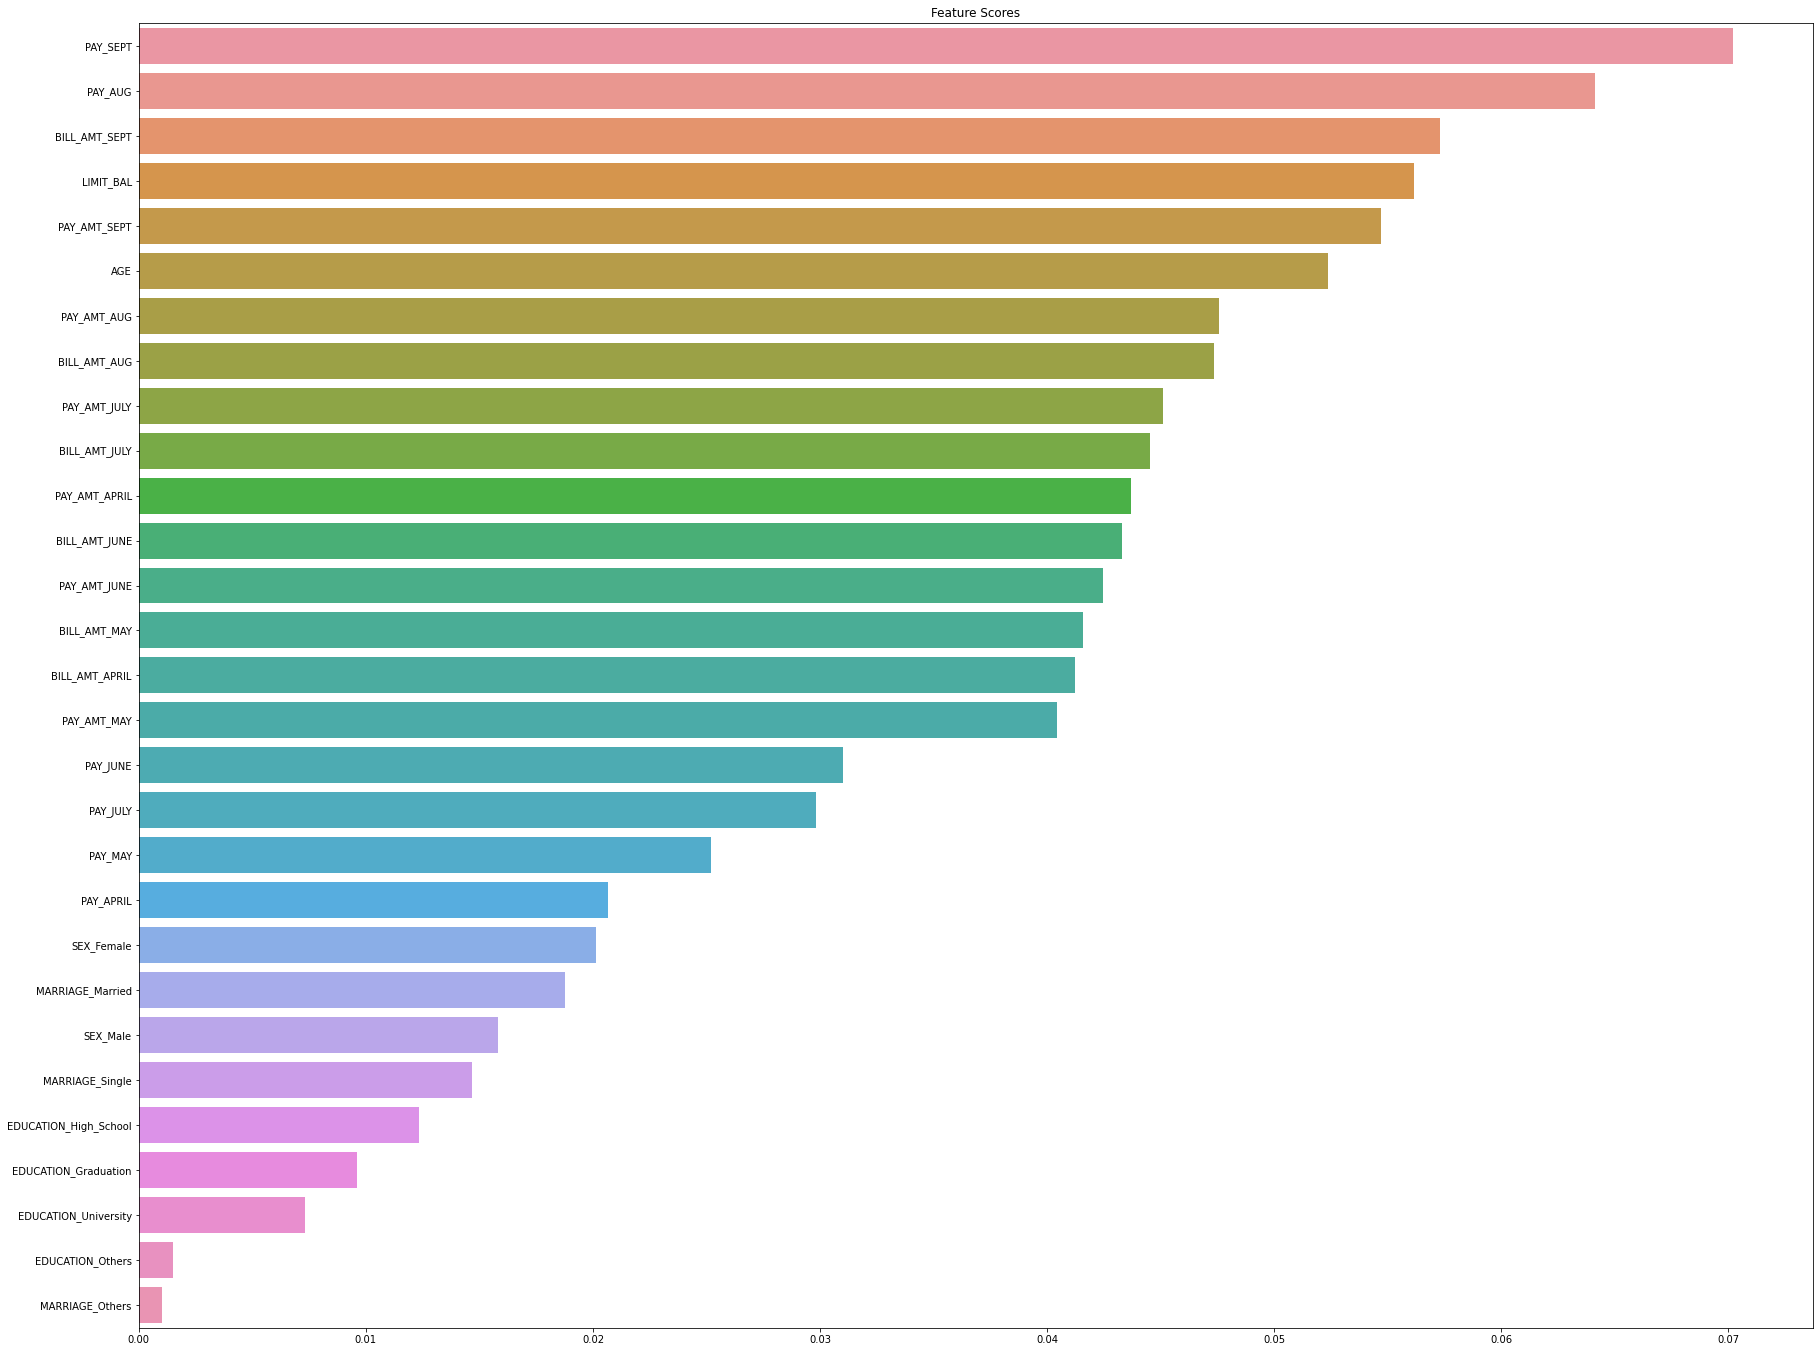

In [ ]:
# Visualizing the scores
f, ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x=feature_scores,
                 y=feature_scores.index)
ax.set_title('Feature Scores')
ax.set_yticklabels(feature_scores.index)
plt.show()

In [ ]:
logger.info('FEATURE SELECTION ENDS!')

INFO:root:FEATURE SELECTION ENDS!


# **5. Model-2 : With important features**

In [ ]:
logger.info('MODEL-2 RUNNING!')

INFO:root:MODEL-2 RUNNING!


In [ ]:
# Create a dataframe from df_model using the top 15 features based on importance score
df_imp = df_model[feature_scores.index[:15]]
df_imp['default'] = df_model['default']
df_imp.head()

# Separate independent and dependent variables
X = df_imp.drop('default', axis=1)
y = df_imp['default']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

INFO:root:TRAIN TEST SPLIT OCCURED!


In [ ]:
# Initiate RandomForestClassifier object
rf_clf_2 = RandomForestClassifier(random_state=6)
rf_clf_2.fit(X_train,y_train)

logger.info('MODEL-2 FITTED ON TRAINING DATA!')

INFO:root:MODEL-2 FITTED ON TRAINING DATA!


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_2.predict(X_train)
test_class_preds = rf_clf_2.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

INFO:root:PREDICTED ON BOTH TRAIN AND TEST DATA


In [ ]:
# Calculate recall scores
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

INFO:root:EVALUATION METRICS CALCULATED


In [ ]:
# Display recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9979118702147026
The recall on test data is  0.863882618510158


**OBSERVATION :** Recall score on test data has improved from the previous model.

Note : Scores might not improve by huge amounts every time we modify the model, but by few points, which does infact, reduce the loss for the organization by considerable amount monetarily.

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

INFO:root:TRAIN RECALL SCORE=0.9979118702147026 
 TEST RECALL SCORE=0.863882618510158


# **6. Feature Engineering : Create feature BILL_AMT_AVG**

In this stage, we create or engineer a new feature BILL_AMT_AVG, by calculating the average of all the bill amounts.

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, STARTS!')

INFO:root:FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, STARTS!


In [ ]:
# Create the new feature in the original dataframe
df_model['BILL_AMT_AVG'] = (df_model['BILL_AMT_APRIL'] + df_model['BILL_AMT_MAY'] + df_model['BILL_AMT_JUNE'] + df_model['BILL_AMT_JULY'] + df_model['BILL_AMT_AUG'] + df_model['BILL_AMT_SEPT'])/6

In [ ]:
# Add the new feature to df_imp
df_imp['BILL_AMT_AVG'] = df_model['BILL_AMT_AVG']
df_imp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PAY_SEPT,PAY_AUG,BILL_AMT_SEPT,LIMIT_BAL,PAY_AMT_SEPT,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,PAY_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,default,BILL_AMT_AVG
0,2,2,3913.0,20000.0,0.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000
1,-1,2,2682.0,120000.0,0.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,1000.0,3455.0,3261.0,1,2846.166667
2,0,0,29239.0,90000.0,1518.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,1000.0,14948.0,15549.0,0,16942.166667
3,0,0,46990.0,50000.0,2000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,1100.0,28959.0,29547.0,0,38555.666667
4,-1,0,8617.0,50000.0,2000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,9000.0,19146.0,19131.0,0,18223.166667


In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

INFO:root:FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!


# **7. Model-3 : With new feature BILL_AMT_AVG**

In [ ]:
logger.info('MODEL-3 RUNNING!')

INFO:root:MODEL-3 RUNNING!


In [ ]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logger.info('TRAIN TEST SPLIT OCCURED!')

INFO:root:TRAIN TEST SPLIT OCCURED!


In [ ]:
rf_clf_3 = RandomForestClassifier(random_state=6)
rf_clf_3.fit(X_train,y_train)

logger.info('MODEL FITTED ON TRAINING DATA!')

INFO:root:MODEL FITTED ON TRAINING DATA!


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_3.predict(X_train)
test_class_preds = rf_clf_3.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

INFO:root:PREDICTED ON BOTH TRAIN AND TEST DATA


In [ ]:
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

INFO:root:EVALUATION METRICS CALCULATED


In [ ]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9979651941097725
The recall on test data is  0.8674807779285392


**OBSERVATION :** Recall score has again improved slightly from te previous model. Threfore we shall keep the newly created feature as one of the independent variables.

In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

INFO:root:TRAIN RECALL SCORE=0.9979651941097725 
 TEST RECALL SCORE=0.8674807779285392


In [ ]:
X[:1]

array([[ 1.63436123,  1.61565429, -0.63147733, -1.06474311, -0.33813726,
        -1.29853647, -0.2180681 , -0.63907025, -0.28797172, -0.6650917 ,
        -0.28291316, -0.66955416, -0.2994787 , -0.65984703, -0.65326331,
        -0.67987705]])

# **8. Feature Engineering : Create feature BILL_PAY_VALUE**

In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_PAY_VALUE, STARTS!')

INFO:root:FEATURE ENGINEERING : FEATURE CREATION BILL_PAY_VALUE, STARTS!


In [ ]:
df_model['BILL_PAY_VALUE'] = ((df_model['PAY_AMT_SEPT']-df_model['BILL_AMT_AUG']) +
                       (df_model['PAY_AMT_AUG']-df_model['BILL_AMT_JULY']) +
                       (df_model['PAY_AMT_JULY']-df_model['BILL_AMT_JUNE']) +
                       (df_model['PAY_AMT_JUNE']-df_model['BILL_AMT_MAY']) +
                       (df_model['PAY_AMT_MAY']-df_model['BILL_AMT_APRIL']))/5

In [ ]:
df_imp['BILL_PAY_VALUE'] = df_model['BILL_PAY_VALUE']
df_imp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PAY_SEPT,PAY_AUG,BILL_AMT_SEPT,LIMIT_BAL,PAY_AMT_SEPT,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,PAY_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,default,BILL_AMT_AVG,BILL_PAY_VALUE
0,2,2,3913.0,20000.0,0.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000,-620.4
1,-1,2,2682.0,120000.0,0.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,1000.0,3455.0,3261.0,1,2846.166667,-2279.0
2,0,0,29239.0,90000.0,1518.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,1000.0,14948.0,15549.0,0,16942.166667,-13279.2
3,0,0,46990.0,50000.0,2000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,1100.0,28959.0,29547.0,0,38555.666667,-35391.2
4,-1,0,8617.0,50000.0,2000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,9000.0,19146.0,19131.0,0,18223.166667,-8470.4


In [ ]:
logger.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

INFO:root:FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!


# **9. Model-4 : With new feature BILL_PAY_VALUE**

In [ ]:
logger.info('MODEL-4 RUNNING!')

INFO:root:MODEL-4 RUNNING!


In [ ]:
#df_imp.drop('BILL_AMT_AVG', axis=1, inplace=True)

In [ ]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [ ]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_clf_4 = RandomForestClassifier(random_state=6)
rf_clf_4.fit(X_train,y_train)

logger.info('MODEL-4 FITTED ON TRAINING DATA!')

INFO:root:MODEL-4 FITTED ON TRAINING DATA!


In [ ]:
# Get the predicted classes
train_class_preds = rf_clf_4.predict(X_train)
test_class_preds = rf_clf_4.predict(X_test)

logger.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

INFO:root:PREDICTED ON BOTH TRAIN AND TEST DATA


In [ ]:
# Recall scores calculated on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logger.info('EVALUATION METRICS CALCULATED')

INFO:root:EVALUATION METRICS CALCULATED


In [ ]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9977518466973557
The recall on test data is  0.8645409317051108


**OBSERVATION :** Recall score has decresed by a couple of points from the previous model. We decide to remove the feature from the independent variable set.

In [ ]:
df_imp.drop('BILL_PAY_VALUE', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
logger.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

INFO:root:TRAIN RECALL SCORE=0.9977518466973557 
 TEST RECALL SCORE=0.8645409317051108


# **10. Save the Model**

In [ ]:
logger.info('SAVING THE MODEL....')

INFO:root:SAVING THE MODEL....


We got the highest recall score using model rf_clf_3 with 0.867. Therefore, we shall save this model for production.

In [ ]:
pickle.dump(rf_clf_3, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

INFO:root:MODEL SAVED!


Compress the model.pkl, since it is difficult to upload a file more than 25mb in Github (for deployment).

In [ ]:
!pip install bz2file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bz2file as bz2 

In [ ]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [ ]:
compressed_pickle('ccdp', rf_clf_3)

In [ ]:
logger.info('PROJECT RUNNING ENDS!')

INFO:root:PROJECT RUNNING ENDS!
